# Основи Jupyter Notebook

Jupyter Notebook --- це веб додаток для інтерактивних обчислень. Для його запуску необхідно в консолі перейти в потрібну папку і виконати команду `jupyter notebook`. Після цього відкриється веб сторінка, де будуть відображатися файли тієї директорії, звідки була запущена команда. Файли Юпітера, які також називаються зошитами, мають розширення **ipynb**. При натисканні на такий файл він відкривається в інтерактивному режимі.

Кожен окремий файл представляє веб сторінку, яка складається з комірок. Кожна комірка може бути двох видів: 1. Markdown або 2. Code.

## Комірка Markdown
Як можна здогадатися з назви в Markdown осередках можна створювати текст в [markdown форматі](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). Підтримуються різні способи форматування, які можна подивитися за посиланням. Текст, який ви зараз читаєте, також знаходиться в markdown клітинці.

Крім форматування тексту також підтримується можливість створення математичних формул за допомогою LaTex. Формулу можна вбудувати в текст (наприклад, $e^{i\pi}=-1$) або створити в окремому рядку:

$$e^x=\sum_{k=0}^\infty \frac{x^k}{k!}$$

Для редагування тексту в markdown осередку необхідно два рази клікнути по ній.

## Комірка Code
Наступна комірка є Сode осередком і в ній можна писати код і виконувати його. Для виконання коду необхідно натиснути **Ctrl + Enter**(виконати і залишитися в поточній комірці) або **Shift + Enter** (виконати і перейти в наступну комірку)

In [ ]:
import numpy as np # імпортуємо бібліотеку

Якщо останній рядок коду повертає яке-небудь значення, то воно відображається відразу після комірки

In [ ]:
np.random.rand(10) # генеруємо випадкові значення

array([0.68528999, 0.70609617, 0.82579621, 0.38756313, 0.87001097,
       0.91044051, 0.31743928, 0.27789269, 0.79610991, 0.58255746])

## Автодоповнення та робота з документацією

Для автодоповнення можна використовувати клавішу `<TAB >` після точки або всередині дужки при виклику функції. При цьому вийде список доступних варіантів, які можна вибрати, щоб автоматично доповнити код. Можете спробувати автодоповнення поставивши курсор після `np.random.<TAB>`.

В Jupyter є кілька способів викликати документацію. Перший спосіб це використовувати поєднання клавіш **Shift + Tab**. Другий спосіб поставити знак `?` після необхідного модуля

In [ ]:
np?

## Magic команди
Jupyter підтримує набір так званих "чарівних" (magic) команд. Це різні корисні команди, які не є частиною Python. Всі ці команди починаються з %.

Можна безпосередньо завантажити вміст зовнішнього файлу в комірку за допомогою команди `%load`

In [ ]:
# %load code/magic_example.py
def square(x): # ініціалізуємо функцію знаходження квадрату вхідного значення
    """
    Squares given number
    """
    return x ** 2 # повертаємо значення


print(square(42)) # виводимо результат

1764


З корисних команд також можна відзначити команду `%timeit`, яка виконує код багато разів і виводить середній час виконання коду

In [ ]:
%timeit L = [n ** 2 for n in range(1000)]

377 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Список усіх magic команд можна подивитися окремою командою `%lsmagic`.

## Робота з графікою

У Python є багато бібліотек для візуалізації даних. Більшість з них інтегруються з Jupyter і відображають графіки. 

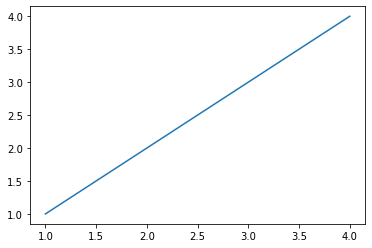

In [ ]:
import matplotlib.pyplot as plt # імпортуємо бібліотеку

# вбудовуємо виведені рисунки в юпітеровський ноутбук
%matplotlib inline

plt.plot([1, 4], [1, 4]) # виводимо лінію за двома точками

Або будуємо декілька графіків:

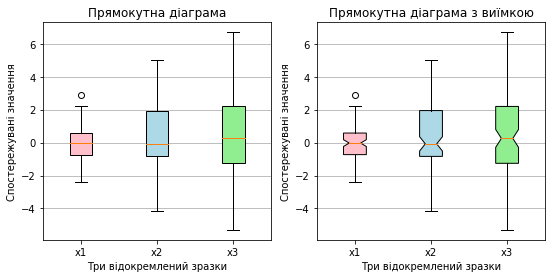

In [ ]:
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)] # генеруємо список значень із нормального розподілу
labels = ['x1', 'x2', 'x3'] # ініціалізуємо список міток

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4)) # ініціалізуємо об'єкт матриці рисунків

# прямокутна коробчаста діаграма
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # вертикальне вирівнювання
                         patch_artist=True,  # заповнити кольором
                         labels=labels)  # використовується для позначення підписів на вісі x
axes[0].set_title('Прямокутна діаграма') # встановлюємо титулку для першого рисунку

# побудова коробчастої діаграми з виїмкою
bplot2 = axes[1].boxplot(all_data,
                         notch=True,
                         vert=True,  # вертикальне вирівнювання
                         patch_artist=True,  # заповнити кольором
                         labels=labels)  # використовується для позначення підписів на вісі x
axes[1].set_title('Прямокутна діаграма з виїмкою') # встановлюємо титулку для другого рисунку

# заповнити кольорами
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# додати сітку з горизонтальних ліній
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Три відокремлений зразки')
    ax.set_ylabel('Спостережувані значення')

Або тривимірну графіку:

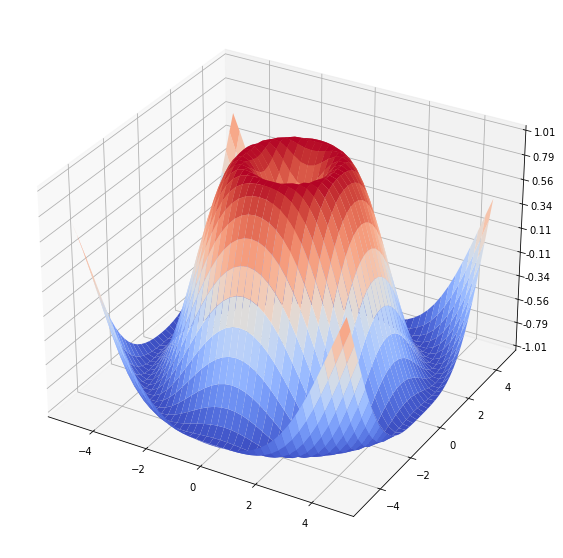

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(10, 10)) # ініціалізуємо об'єкт рисунок
ax = fig.add_subplot(projection='3d') # додаємо до об'єкту тривимірне представлення

# ініціалізуємо дані
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) # заповнюємо поверхню значеннями за двома вісями
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) # ініціалізуємо значення по вісі Oz

# будуємо поверхню
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm) # будуємо тривимірну поверхню по заданим значенням

ax.set_zlim(-1.01, 1.01) # встановлюємо границі по вісі Oz
ax.zaxis.set_major_locator(LinearLocator(10)) # встановлюємо 10 граничних ліній по вісі Oz
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) # визначаємо формат виведення значень


## Інші можливості
Для Jupyter Notebook було створено велику кількість плагінів. Наприклад, можна вбудовувати відео з youtube:

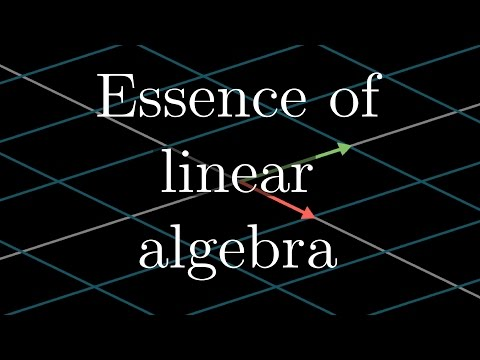

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kjBOesZCoqc')

Або інтерактивні карти (дана комірка відобразиться тільки якщо у вас встановлений [folium](https://github.com/python-visualization/folium). Якщо у вас нічого не відображається, то можете пропустити даний приклад, він далі не знадобиться)

Встановити необхідну бібліотеку можна через команду `pip install назва бібліотеки`, яку варто прописати в консолі, як представлено в прикладі нижче:

![](Images\ap3\Screenshot_1.jpg)

Або, як варіант, можна прописати команду прямо в комірці середовища Jupyter Notebook, як представлено в прикладі нижче:

In [ ]:
#| output: false

!pip install folium

In [ ]:
import folium
m = folium.Map(zoom_start=12, location=[47.89829743895897, 33.36626740165739])
m

Або вбудувати будь-який інший шматок HTML за допомогою магічної команди `%%html`. Нижче наведено приклад вбудовування посту з Твіттеру:

In [ ]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Replace &quot;AI&quot; with &quot;matrix multiplication &amp; gradient descent&quot; in the calls for &quot;government regulation of AI&quot; to see just how absurd they are</p>&mdash; Ben Hamner (@benhamner) <a href="https://twitter.com/benhamner/status/892136662171504640?ref_src=twsrc%5Etfw">July 31, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


## Гарячі клавіші
Багато дій можна виконати за допомогою так званих гарячих клавіш. Список гарячих клавіш можна знайти в меню *Help - Keyboard shortcuts*.
Нижче наведено список найбільш корисних поєднань:

| Ключ           | Опис                                                 |
|----------------|----------------------------------------------------------|
|  Esc           | вийти з режиму редагування та виділити поточну комірку |
|  Enter         | перейти в режим редагування поточної комірки     |
|  Ctrl+S, S     | зберегти файл                                          |
|  Ctrl+Enter    | виконати код і залишитися в поточній комірці                |
|  Shift + Enter | виконати код і перейти в наступну клітинку               |
|  Shift + Tab   | виводить спливаюче вікно з документацією                 |
|  a             | додати комірку згори (above)                           |
|  b             | додати комірку знизу  (below)                           |
|  c             | скопіювати комірку                                       |
|  v             | вставити скопійовану клітинку                            |
|  dd            | видалити комірку                                           |
|  z             | скасування останньої дії                               |